# **Notebook PC#04 (Part B)**
# MLP classifier for the MNIST database.
#### Grid search for the hyperparameters. Code produced by previous students of IA353. Thank you for making PC#04 still more complete and informative.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Ariel Góes de Castro <br>
**Aluno(a):** Francisco Germano Vogt <br>

In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import gc

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2024-04-10 13:54:25.754761: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-10 13:54:25.802583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 13:54:25.802625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 13:54:25.803827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 13:54:25.811704: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def model_and_evaluate(n_neurons = 512,
                       n_layers  = 1,
                       dropout   = 0.25,
                       epochs    = 5,
                       optimizer = 'adam',
                       verbose   = 1):
    gc.collect()
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu),
          tf.keras.layers.Dropout(dropout)])

    if n_layers > 1:
        for _ in range(n_layers-1):
            model.add(tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu))
            model.add(tf.keras.layers.Dropout(dropout))

    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=epochs, verbose=verbose)

    loss, accuracy = model.evaluate(x_test, y_test,verbose=verbose)

    if verbose:
        model.summary()
        # Evaluate the model on the test data using `evaluate`
        print("Evaluate on test data")
        print("test loss, test acc:", loss, accuracy)

    train_result = dict(n_neurons = n_neurons,
                        n_layers  = n_layers,
                        optimizer = optimizer,
                        dropout   = dropout,
                        epochs    = epochs,
                        loss      = loss,
                        accuracy  = accuracy)
    return loss, accuracy

In [3]:
n_repetitions = 5
DEFAULT = {
    'n_neurons' : 512,
    'n_layers'  : 1,
    'dropout'   : 0.25,
    'epochs'    : 5,
    'optimizer' : 'adam'
}

df = pd.DataFrame(columns=['n_neurons', 'n_layers', 'dropout', 'epochs','optimizer'] + \
                          [f"{metric} {iteration}" for iteration in range(1, n_repetitions+1) for metric in ['loss', 'accuracy']])

In [4]:
args = DEFAULT.copy()
row = list(args.values())
for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(verbose=0)

        row.append(loss)
        row.append(accuracy)
df.loc[0] = row

  0%|          | 0/5 [00:00<?, ?it/s]

2024-04-10 13:54:28.408359: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 13:54:28.447012: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 13:54:28.447223: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
for n_neurons in [1024, 2048, 4096]:
    args = DEFAULT.copy()
    args['n_neurons'] = n_neurons

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_neurons=n_neurons, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_neurons={n_neurons}'] = row


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
for n_layers in [2, 3, 4]:
    args = DEFAULT.copy()
    args['n_layers'] = n_layers

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_layers=n_layers, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_layers={n_layers}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
for dropout in [0, 0.5]:
    args = DEFAULT.copy()
    args['dropout'] = dropout

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(dropout=dropout, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'dropout={dropout}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
for optimizer in ['RMSprop', 'SGD']:
    args = DEFAULT.copy()
    args['optimizer'] = optimizer

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(optimizer=optimizer, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'optimizer={optimizer}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
for epochs in [10, 20, 30]:
    args = DEFAULT.copy()
    args['epochs'] = epochs

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(epochs=epochs, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'epochs={epochs}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [23]:
df.to_csv('mnist_PC04_MLP_analysis.csv',index=False)
#df.head()
#df

In [19]:
df = pd.read_csv('mnist_PC04_MLP_analysis.csv')
#df.head()
df

,n_neurons,n_layers,dropout,epochs,optimizer,loss 1,accuracy 1,loss 2,accuracy 2,loss 3,accuracy 3,loss 4,accuracy 4,loss 5,accuracy 5
0,512,1,0.25,5,adam,0.063584,0.9800,0.065366,0.9799,0.060666,0.9810,0.075447,0.9782,0.060783,0.9810
1,1024,1,0.25,5,adam,0.064024,0.9798,0.069597,0.9798,0.069296,0.9808,0.072827,0.9786,0.075089,0.9780
2,2048,1,0.25,5,adam,0.076037,0.9776,0.095803,0.9768,0.081909,0.9763,0.067331,0.9807,0.077522,0.9791
3,4096,1,0.25,5,adam,0.076889,0.9812,0.101023,0.9740,0.083719,0.9772,0.066843,0.9829,0.094265,0.9744
4,512,2,0.25,5,adam,0.069791,0.9791,0.077362,0.9773,0.072583,0.9801,0.069737,0.9813,0.079043,0.9768
5,512,3,0.25,5,adam,0.083548,0.9770,0.081891,0.9777,0.084201,0.9778,0.087515,0.9767,0.066853,0.9815
6,512,4,0.25,5,adam,0.096859,0.9770,0.087405,0.9758,0.085669,0.9789,0.093471,0.9769,0.091648,0.9767
7,512,1,0.00,5,adam,0.072746,0.9792,0.084236,0.9768,0.078817,0.9763,0.063773,0.9804,0.070601,0.9785
8,512,1,0.50,5,adam,0.069985,0.9788,0.068193,0.9782,0.069156,0.9794,0.070422,0.9770,0.066050,0.9809
9,512,1,0.25,5,RMSprop,0.079694,0.9780,0.072654,0.9805,0.069790,0.9812,0.082971,0.9764,0.073966,0.9802


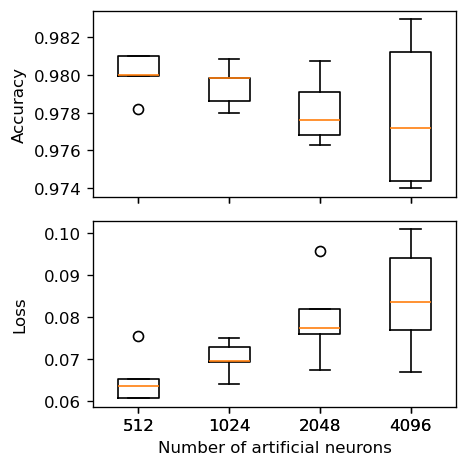

In [12]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, n_neurons in enumerate([512,1024,2048,4096]):
    sample = df[(df['n_neurons'] == n_neurons) & (df['n_layers'] == 1) & (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[512,1024,2048,4096])
ax[1].boxplot(losses, labels=[512,1024,2048,4096])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of artificial neurons')
fig.align_ylabels()
plt.tight_layout()


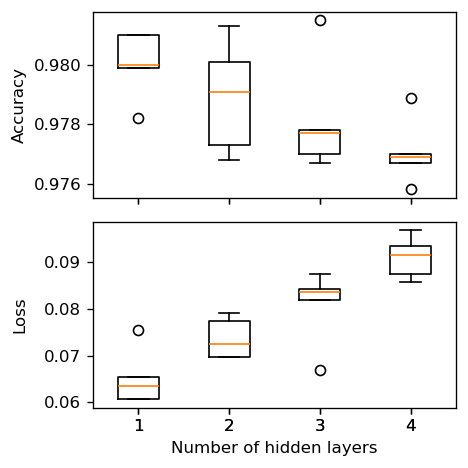

In [13]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, n_layers in enumerate([1,2,3,4]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == n_layers)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[1,2,3,4])
ax[1].boxplot(losses, labels=[1,2,3,4])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of hidden layers')
fig.align_ylabels()
plt.tight_layout()

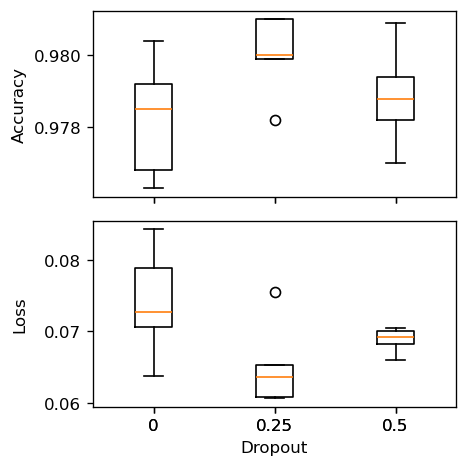

In [14]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, dropout in enumerate([0, 0.25, 0.5]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == dropout) & (df['optimizer'] == 'adam') & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[0,0.25,0.5])
ax[1].boxplot(losses, labels=[0,0.25,0.5])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Dropout')
fig.align_ylabels()
plt.tight_layout()

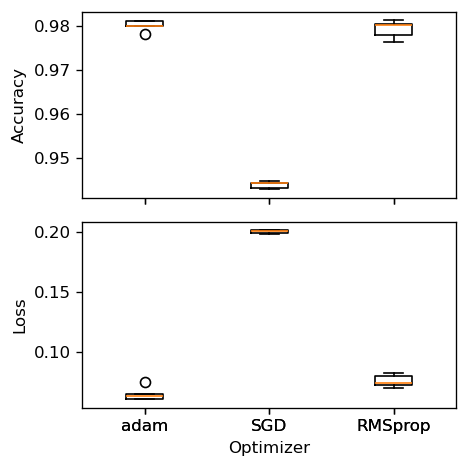

In [15]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, optimizer in enumerate(['adam','SGD','RMSprop']):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == optimizer) & (df['epochs'] == 5)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=['adam','SGD','RMSprop'])
ax[1].boxplot(losses, labels=['adam','SGD','RMSprop'])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Optimizer')
fig.align_ylabels()
plt.tight_layout()

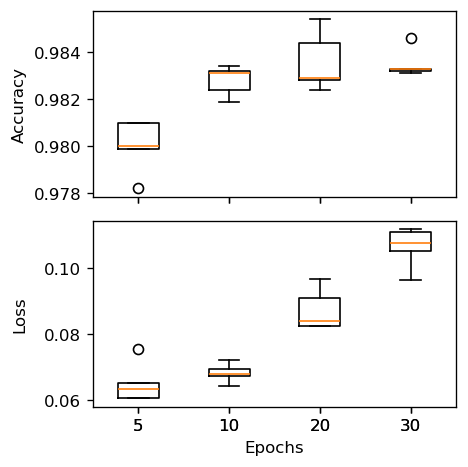

In [16]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, epochs in enumerate([5,10,20,30]):
    sample = df[(df['n_neurons'] == 512) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == epochs)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, labels=[5,10,20,30])
ax[1].boxplot(losses, labels=[5,10,20,30])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
fig.align_ylabels()
plt.tight_layout()

In [18]:
# Please, replace the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=512,
                       n_layers=1,
                       dropout=0.25,
                       optimizer='adam',
                       epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2253 - accuracy: 0.9337
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1009 - accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0556 - accuracy: 0.9818
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9781
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
               

In [24]:
# Please, replace the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=512,
                       n_layers=1,
                       dropout=0.25,
                       optimizer='adam',
                       epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2248 - accuracy: 0.9339
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9696
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9763
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0585 - accuracy: 0.9813
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0479 - accuracy: 0.9848
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9869
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9883
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0322 - accuracy: 0.9897
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9905
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.026

In [25]:
# Please, replace the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=512,
                       n_layers=1,
                       dropout=0.25,
                       optimizer='adam',
                       epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2257 - accuracy: 0.9346
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9684
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9771
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9800
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9842
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9871
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9880
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9900
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

In [21]:
# Please, replace the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=1024,
                       n_layers=1,
                       dropout=0.25,
                       optimizer='adam',
                       epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2055 - accuracy: 0.9378
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0920 - accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9832
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9796
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
               

Acreditamos que `n_neurons=512, n_layers=1, dropout=0.25, optimizer='adam', epochs=20` seja o melhor conjunto de dados, considerando os hiperparâmetros testados neste código.

Vamos tentar explicar a lógica utilizada para chegar nessa conclusão com base em observações visuais dos gráficos:
1. **Número de neurônios (512, 1024, 2048, 4096):** Escolheu-se 512. Os quartis Q1 e Q3 estão muito próximos da mediana (com exceção de um outlier) que possui o menor valor absoluto de Loss, ao mesmo tempo em que a Acurácia apresenta um comportamento semelhante com o IQR (Interquartile Range) pequeno e um valor consideravelmente alto. Do contrário, no valor 1024, 25% dos valores (no Loss) estão em uma região que pode ultrapassar o outlier para o Loss em 512;

2. **Número de camadas (1, 2, 3, 4):** Escolheu-se 1. A mediana se situa em 98%, com a menor mediana de Loss (~0.064). Considerando-se apenas 512 neurônios para todos os casos, para 2 camadas teríamos valores mais esparsos no IQR e mediana menor, apesar de existir a possibilidade de algumas execuções ultrapassarem a acurácia com uma camada, optou-se por decisões mais "conservadores". Já em 3 camadas, teríamos uma probabilidade de obter outliers, com perdas muito boas (menores) e acurácia próximo de 99%, mas esse não representa o comportamento geral dessa configuração;

3. **Dropout (0, 0.25, 0.5):** Escolheu-se 0.25. O valor padrão de 0.25 para o Dropout já demonstra ter Acurácia maior e Loss menor no geral. Mesmo considerando o seu outlier para a Acurácia, se aproxima muito do valor da mediana, além de possuir um IQR muito próximo da Mediana para diferentes execuções. Nem mesmo o limite superior (valor adjacente superior) do Dropout 0.5 (na Acurácia) superam os valores obtidos para o Dropout 0.25;

4. **Optimizer (adam, SGD, RMSprop):** Escolheu-se o otimizador 'adam'. Claramente, o adam desempenha melhor em todas as métricas consideradas: Accurary e Loss.

5. **Epochs (5, 10, 20, 30):** Escolheu-se 20. Os testes com n_epochs=20 e n_epochs=30 também foram feitos (logo acima), que corroboram que a execução de 30 epócas já não gera um ganho considerável para o modelo (considerando os outros parâmetros fixos, é claro). O erro, no entanto, claramente da vantagem para o caso de apenas 20 épocas. mesmo o seu limite superior está abaixo da mediana para o caso em que temos 30 épocas sendo executadas.